# Example to create XKCD style plots
Source
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xkcd.html

Font
https://github.com/ipython/xkcd-font/

# Installation of font
Only need to run this cell to get it to work the first time

Instructions:
1. Install the fonts in the font folder to your system
2. Delete the old matplotlib fontlist cache at 

    C:\Users\<username>\.matplotlib

3. Run this cell block

In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_dirs = ["font"]  # The path(s) to the custom font file.
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [1]:
# Further example of how you could load a new custom font and use it somewhere in your chart
# Note: No need to run this cell in this notebook (won't harm anything either)

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

font = FontProperties(fname="font/xkcd-Regular.otf")

# example:
# plt.title("My Plot", fontproperties=font)

# Plot examples

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# scale
# The amplitude of the wiggle perpendicular to the source line.

# length
# The length of the wiggle along the line.

# randomness
# The scale factor by which the length is shrunken or expanded.

SCALE = 1
LENGTH = 100
RANDOMNESS = 2

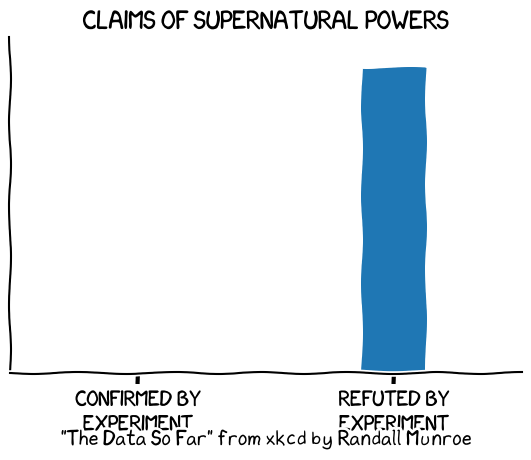

In [60]:
# Example bar graph
with plt.xkcd(scale=SCALE, length=LENGTH, randomness=RANDOMNESS):
    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.bar([0, 1], [0, 100], 0.25)
    ax.spines[['top', 'right']].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
    ax.set_xlim([-0.5, 1.5])
    ax.set_yticks([])
    ax.set_ylim([0, 110])

    ax.set_title("CLAIMS OF SUPERNATURAL POWERS")

    fig.text(
        0.5, 0.05,
        '"The Data So Far" from xkcd by Randall Munroe',
        ha='center')

plt.show()

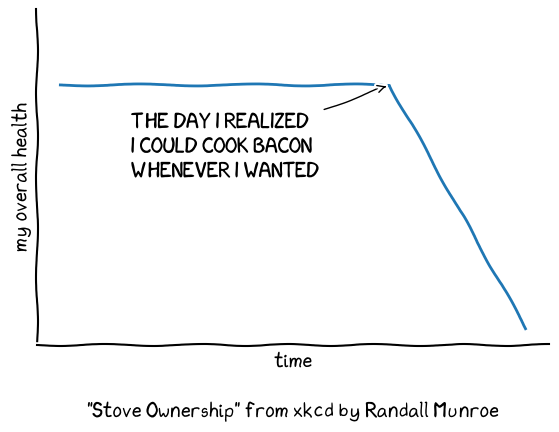

In [61]:
# Example line graph
with plt.xkcd(scale=SCALE, length=LENGTH, randomness=RANDOMNESS):
    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    ax.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    ax.plot(data)

    ax.set_xlabel('time')
    ax.set_ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Munroe',
        ha='center')

plt.show()

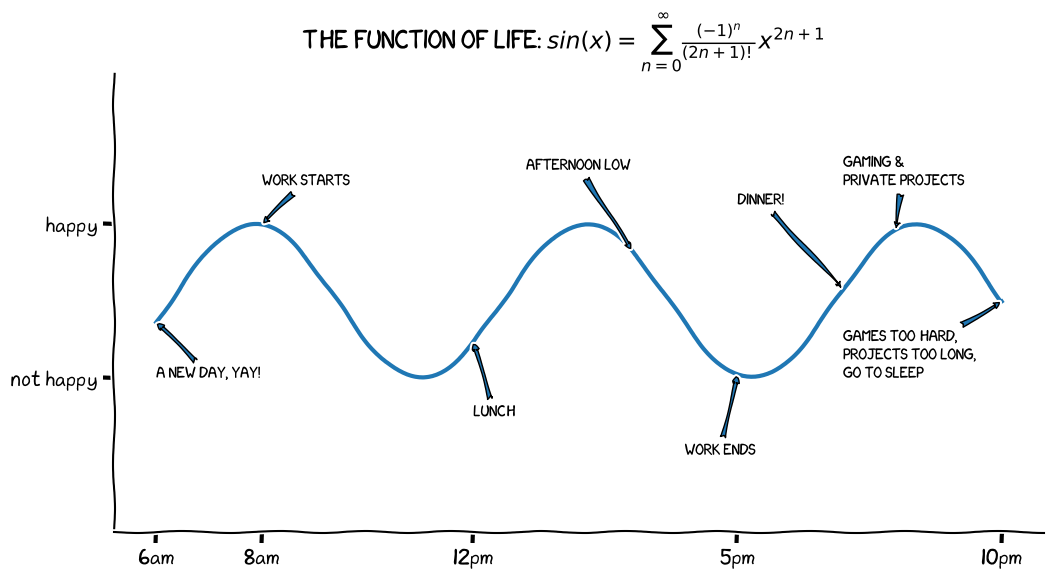

In [62]:
# Example line graph expanded

annotations = [
    "a new day, yay!", 
    "work starts", 
    "lunch", 
    "afternoon low", 
    "work ends",
    "dinner!", 
    "gaming &\nprivate projects", 
    "games too hard,\nprojects too long,\ngo to sleep"
]
annotation_pts = [(x, np.sin(x)) for x in (6, 8, 12, 15, 17, 19, 20, 22)]
text_positions = [(6, -1), (8, 1.5), (12, -1.5), (13, 1.7),
                    (16,-2), (17, 1.25), (19, 1.5), (19, -1)]
SINE_FORMULA = r"$sin(x) = \sum_{n=0}^\infty\frac{(-1)^n}{(2n+1)!}x^{2n+1}$"

PLOT_WIDTH = 12
PLOT_HEIGHT = 6 

def sine_is_life():
    fig, ax = plt.subplots(figsize=(PLOT_WIDTH, PLOT_HEIGHT))
    fig.suptitle(f"THE FUNCTION OF LIFE: {SINE_FORMULA}")

    ax.set_ylim(-3, 3)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    x = np.linspace(6, 22, 200)
    y = np.sin(x)
    
    plt.xticks([6, 8, 12, 17, 22], ["6am", "8am", "12pm", "5pm", "10pm"])
    plt.yticks([-1, 1], ["not happy", "happy"])

    for text, point, text_pos in zip(annotations, annotation_pts, text_positions):
        ax.annotate(
            text.upper(),
            xy=point, 
            size=10,
            xytext=text_pos,
            arrowprops=dict(arrowstyle='fancy')
        )

    ax.plot(x, y, linewidth=3)
    plt.show()


with plt.xkcd(scale=SCALE, length=LENGTH, randomness=RANDOMNESS):
    sine_is_life()

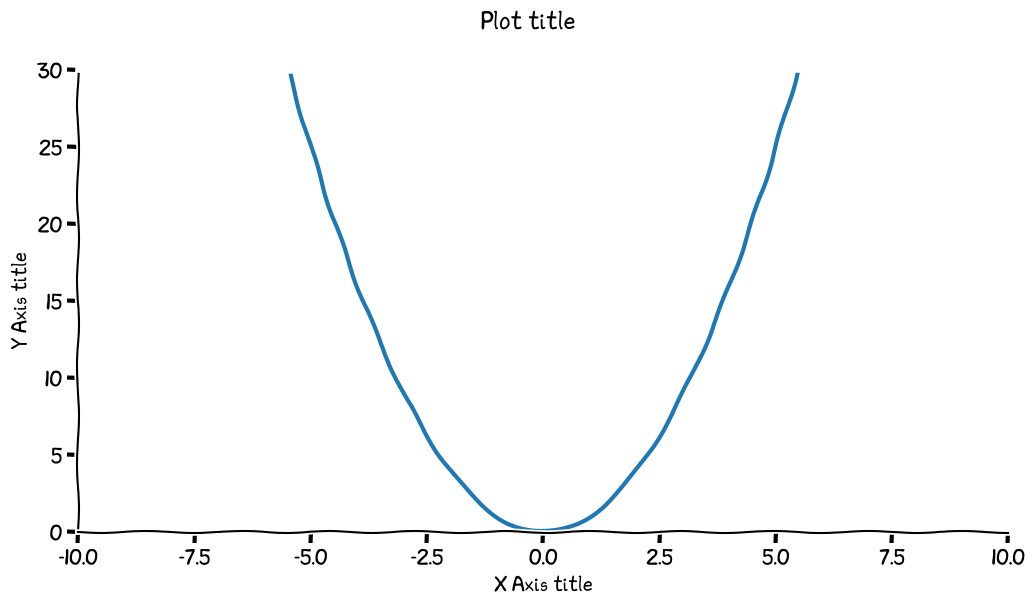

In [63]:
# Example line graph generic

PLOT_TITLE = "Plot title"
AXIS_TITLE_X = "X Axis title"
AXIS_TITLE_Y = "Y Axis title"
PLOT_WIDTH = 12
PLOT_HEIGHT = 6 

def plot_data():
    fig, ax = plt.subplots(figsize=(PLOT_WIDTH, PLOT_HEIGHT))
    fig.suptitle(PLOT_TITLE)

    ax.spines['right'].set_color('none') # comment these lines out if you want to keep the top and right borders on the plot
    ax.spines['top'].set_color('none')

    # generate or insert your data here
    x = np.linspace(-10, 10, 200)
    y = x**2
    
    ax.plot(x, y, linewidth=3)

    ax.set_xlabel(AXIS_TITLE_X)
    ax.set_ylabel(AXIS_TITLE_Y)
    ax.set_ylim(0, 30)
    ax.set_xlim(-10, 10)
    plt.show()

with plt.xkcd(scale=SCALE, length=LENGTH, randomness=RANDOMNESS):
    plot_data()

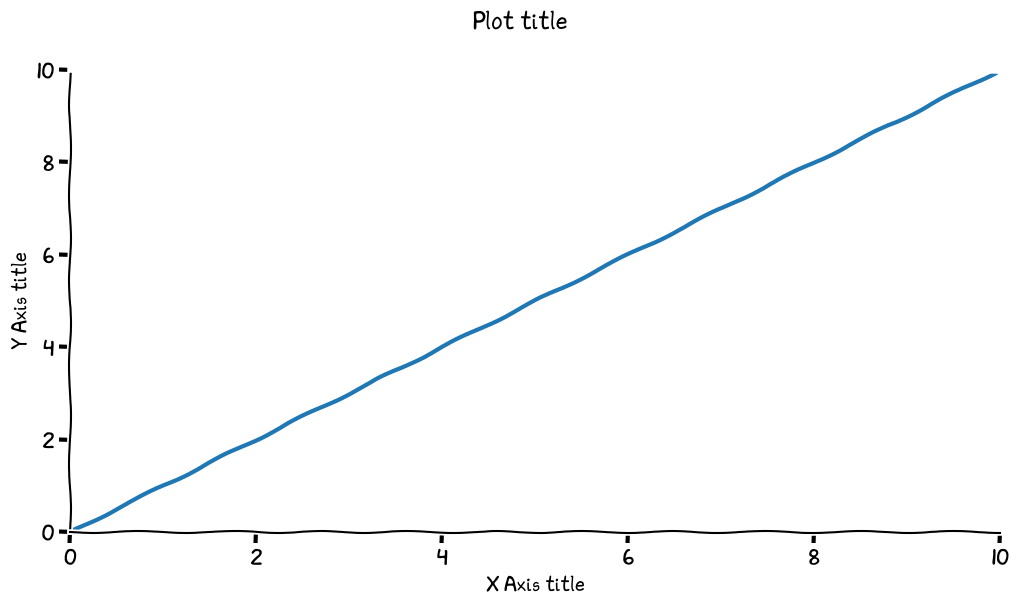

In [64]:
# Example live data (different solution for running in python file vs jupyter notebook)
# This method will not work in jupyter notebook. You must copy this code into a python file to run it.
# See 'live_plot.py' for working example

PLOT_TITLE = "Plot title"
AXIS_TITLE_X = "X Axis title"
AXIS_TITLE_Y = "Y Axis title"
PLOT_WIDTH = 12
PLOT_HEIGHT = 6 

import time
from matplotlib.animation import FuncAnimation
NUMBER_OF_ITERATIONS = 4

def plot_data(x, y):
    line1.set_ydata(y)
    fig.canvas.draw()
    fig.canvas.flush_events()
    return line1

with plt.xkcd(scale=SCALE, length=LENGTH, randomness=RANDOMNESS):
    plt.ion()

    fig, ax = plt.subplots(figsize=(PLOT_WIDTH, PLOT_HEIGHT))
    fig.suptitle(PLOT_TITLE)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xlabel(AXIS_TITLE_X)
    ax.set_ylabel(AXIS_TITLE_Y)
    ax.set_ylim(0, 10)
    ax.set_xlim(0, 10)

    x = np.linspace(-10, 10, 200)
    y = [n * 1 for n in x]
    line1, = ax.plot(x, y, linewidth=3)

    for i in range(NUMBER_OF_ITERATIONS):

        y = [n / (i+1) for n in x]
        plot_data(x, y)

        plt.pause(0.25)
